In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

##### Original problem (root finding):

$f(x) = 0$

$f(x) = x^{2} -x -2 = 0$

In [2]:
def f(x):
    return x**2 - x -2

In [4]:
#x = np.linspace(-5,5,100)
x = np.linspace(0,5,100)

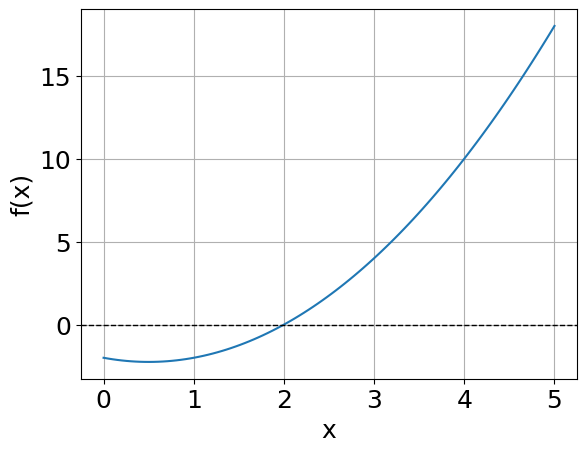

In [5]:
plt.rc("font", size=18)
fig, ax = plt.subplots()

ax.plot(x,f(x))
ax.axhline(y=0, ls='--', lw=1, color='k')

ax.set(xlabel='x', ylabel='f(x)')
ax.set_xticks(np.arange(min(x), max(x)+0.01,1.))

ax.grid()

plt.show()

#### Fixed-point iteration method

Express in the form:
$x$ = $g(x)$

Possibilities:

$x = x^{2}-2$ 

$x = \sqrt{x+2}$

$x = 1+2/x$


In [6]:
def g1(x):
    return x**2 - 2.

def g2(x):
    return np.sqrt(x+2)

def g3(x):
    return 1+2/x

In [7]:
fixed_point_functions = [g1, g2, g3]

In [8]:
x = np.linspace(0.,5.,100)

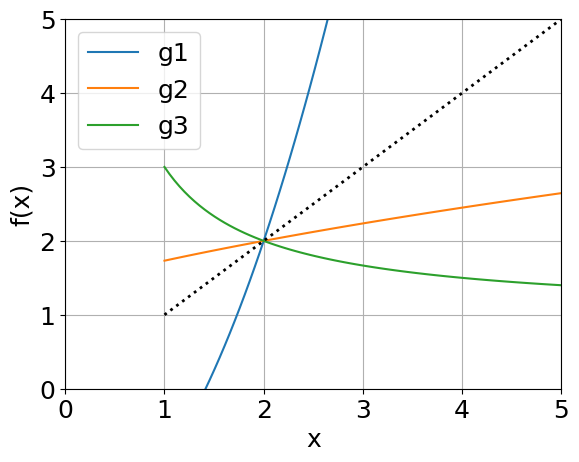

In [11]:
plt.rc("font", size=18)
fig, ax = plt.subplots()

for g in fixed_point_functions:
    ax.plot(x,g(x), label=g.__name__)

y=x    
ax.plot(x,y, lw=2, ls=':', color='k')

ax.set_ylim([0.,5.0])
ax.set_xlim([0.,5.0])

ax.set(xlabel='x', ylabel='f(x)')

#ax.set_xticks(np.arange(0., 5.01,1))


ax.grid()
ax.legend(loc='best')
plt.show()

Can you find the solution of $x = g(x)$?

Solution of the equation $x = g(x)$ is called the fixed-point of $g(x)$

or 

A number $\alpha$ is said to be a fixed-point of a function $g(x)$ if $\alpha = g(\alpha)$ 

In [10]:
x = np.linspace(1.,6.,100)

x_new after 1 iteration:2.41000
x_new after 2 iteration:3.80810
x_new after 3 iteration:12.50163
x_new after 4 iteration:154.29064


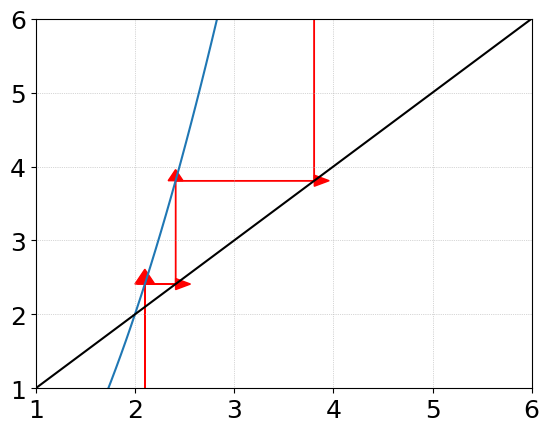

In [13]:
plt.rc("font", size=18)
fig, ax = plt.subplots()

ax.set_ylim([min(x), max(x)])
ax.set_xlim([min(x), max(x)])

##plot g1(x)
ax.plot(x,g1(x))

##plot y=x
y=x    
ax.plot(x,y, lw=1.5, ls='-', color='k')

## Say we run for four number of iterations
n_itr = 4

##plotting iterations of fixed point method using ax.arrow function!
#ax.arrow?

## starting guess value
k = 2.1
ax.arrow(k,0, 0, g1(k)-0, head_width=0.2, head_length=0.2, fc='r', ec='r')

for i in range(n_itr):
    k_new = g1(k)
    ax.arrow(k,k_new, k_new-k, 0, head_width=0.15, head_length=0.15, fc='r', ec='r')
    ax.arrow(k,k, 0, k_new-k, head_width=0.15, head_length=0.15, fc='r', ec='r')

    k = k_new
    print('x_new after {} iteration:{:.5f}'.format(i+1,k))


ax.grid(lw=0.5, ls=":")
plt.show()

In [14]:
x = np.linspace(0.5,2.5,100)

x_new after0 iteration:1.73205
x_new after1 iteration:1.93185
x_new after2 iteration:1.98289
x_new after3 iteration:1.99572


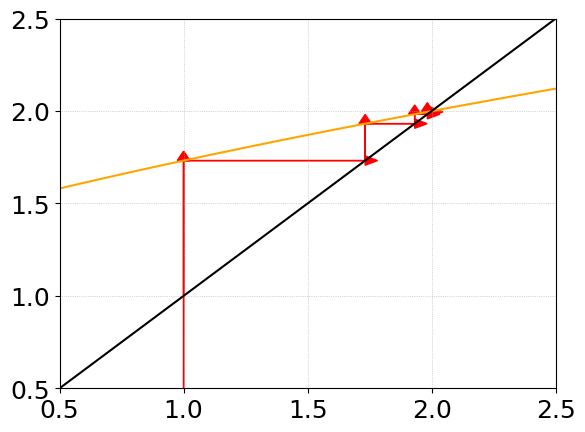

In [21]:
plt.rc("font", size=18)
fig, ax = plt.subplots()

ax.set_ylim([min(x), max(x)])
ax.set_xlim([min(x), max(x)])

##plot g2(x)
ax.plot(x,g2(x),color='orange')

y=x    
ax.plot(x,y, lw=1.5, ls='-', color='k')

## Say we run for four number of iterations
n_itr = 4

## starting guess value
k = 1
ax.arrow(k,0, 0, g2(k)-0, head_width=0.05, head_length=0.05, fc='r', ec='r')

for i in range(n_itr):
    k_new = g2(k)
    ax.arrow(k,k_new, k_new-k, 0, head_width=0.05, head_length=0.05, fc='r', ec='r')
    ax.arrow(k,k, 0, k_new-k, head_width=0.05, head_length=0.05, fc='r', ec='r')

    k = k_new
    print('x_new after{} iteration:{:.5f}'.format(i,k))


ax.grid(lw=0.5, ls=":")
plt.show()

In [22]:
x = np.linspace(0.5,5.,100)

x_new after0 iteration:3.00000
x_new after1 iteration:1.66667
x_new after2 iteration:2.20000
x_new after3 iteration:1.90909
x_new after4 iteration:2.04762


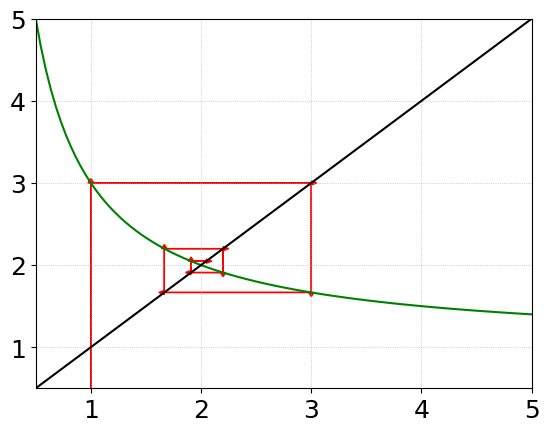

In [18]:
plt.rc("font", size=18)
fig, ax = plt.subplots()

ax.set_ylim([min(x), max(x)])
ax.set_xlim([min(x), max(x)])

##plot g2(x)
ax.plot(x,g3(x),color='green')

y=x    
ax.plot(x,y, lw=1.5, ls='-', color='k')

## Say we run for ten number of iterations
n_itr = 5

## starting guess value
k = 1
ax.arrow(k,0, 0, g3(k)-0, head_width=0.05, head_length=0.05, fc='r', ec='r')

for i in range(n_itr):
    k_new = g3(k)
    ax.arrow(k,k_new, k_new-k, 0, head_width=0.05, head_length=0.05, fc='r', ec='r')
    ax.arrow(k,k, 0, k_new-k, head_width=0.05, head_length=0.05, fc='r', ec='r')

    k = k_new
    print('x_new after{} iteration:{:.5f}'.format(i,k))


ax.grid(lw=0.5, ls=":")
plt.show()

### Fixed-point method iterative scheme

$x^{(n+1)} = g(x^{(n)})$, where n=0, 1, 2, ...

$g(x)$ is continous and differentiable function in interval [a,b]

$\alpha$ be the root in [a,b], such that $\alpha = g(\alpha)$

Fixed-point method is confirmed convergence if:

1. $ a \leq g(x) \leq b$ for $x \in [a,b]$

2. $\lvert g^{\prime}(x) \lvert \leq \kappa < 1$, where constant $\kappa > 0 $, for all $x \in [a,b]$

$\alpha \in [a,b]$ is the root and a unique fixed point, with $\lvert g^{'}(\alpha) \lvert < 1$

### Newton's method

Iterative scheme:

$x^{(n+1)} = x^{(n)} - \frac{f(x^{(n)})}{f^{\prime}(x^{(n)})}$

special case, comparing Newton's method to fixed-point method, where:

$g(x^{(n)}) = x^{(n)} - \frac{f(x^{(n)})}{f^{\prime}(x^{(n)})}$

### System of non-linear equations

Given set of non-linear equations of $n$ independent variables $x_{1}, ..., x_{n}$

$f_{1}(x_{1}, ..., x_{n}) = 0$

$f_{2}(x_{1}, ..., x_{n}) = 0$

$\vdots$

$f_{n}(x_{1}, ..., x_{n}) = 0$

Example:

$1 + x_{1} - x_{2}^2 = 0$

$x_{2} - x_{1}^{3} = 0$

In [15]:
def f1(x1,x2):
    return 1 + x1 - x2**2

def f2(x1,x2):
    return x2 - x1**3

In [16]:
def g1(x1, x2):
    return x2**(1/3)

def g2(x1, x2):
    return (1+x1)**(1/2)

In [19]:
n_iter = 10

### starting guess
x1 = 1.5
x2 = 1.5


print('i x1       x2')
print("{} {:.6f} {:.6f}".format(0, x1, x2))

for i in range(1, n_iter):
    x1_new = g1(x1,x2)
    x2_new = g2(x1,x2)
    x1 = x1_new
    x2 = x2_new
    

    print("{} {:.6f} {:.6f}".format(i, x1, x2))

i x1       x2
0 1.500000 1.500000
1 1.144714 1.581139
2 1.164993 1.464484
3 1.135607 1.471392
4 1.137390 1.461372
5 1.134802 1.461982
6 1.134960 1.461096
7 1.134731 1.461150
8 1.134745 1.461072
9 1.134725 1.461077


In [20]:
n_iter = 10

x1 = np.zeros(n_iter)
x2 = np.zeros(n_iter)

x1[0] = 1.5
x2[0] = 1.5

## Shorter vectorized-form of the loop
for i in range(1, n_iter):
    x1[i] = g1(x1[i-1], x2[i-1])
    x2[i] = g2(x1[i-1], x2[i-1])

In [21]:
alpha1 = 1.134724
alpha2 = 1.461069

In [22]:
data = np.column_stack((x1, x2, f1(x1,x2), f2(x1,x2)))
colvals = ['x1', 'x2', 'f1(x1,x2)', 'f2(x1,x2)']

In [23]:
pd.DataFrame(data, columns=colvals).round(8)

,x1,x2,"f1(x1,x2)","f2(x1,x2)"
0,1.500000,1.500000,0.250000,-1.875000
1,1.144714,1.581139,-0.355286,0.081139
2,1.164993,1.464484,0.020279,-0.116655
3,1.135607,1.471392,-0.029386,0.006907
4,1.137390,1.461372,0.001783,-0.010020
5,1.134802,1.461982,-0.002588,0.000610
6,1.134960,1.461096,0.000158,-0.000885
7,1.134731,1.461150,-0.000229,0.000054
8,1.134745,1.461072,0.000014,-0.000078
9,1.134725,1.461077,-0.000020,0.000005


In [24]:
##Consider solving fixed-point method for multivariables using Gauss-Seidel approach

n_iter = 10

x1 = np.zeros(n_iter)
x2 = np.zeros(n_iter)

x1[0] = 1.5
x2[0] = 1.5

for i in range(1, n_iter):
    x1[i] = g1(x1[i-1], x2[i-1])
    x2[i] = g2(x1[i], x2[i-1])

In [33]:
f1 = 1+x1-x2**2

In [34]:
f2 = x2 - x1**3

In [35]:
data_GS = np.column_stack((x1, x2, f1, f2))
colvals = ['x1', 'x2', 'f1(x1,x2)', 'f2(x1,x2)']

In [37]:
# Gauss-Seidel converges faster
pd.DataFrame(data_GS, columns=colvals).round(8)

,x1,x2,"f1(x1,x2)","f2(x1,x2)"
0,1.500000,1.500000,0.25,-1.875000e+00
1,1.144714,1.464484,0.00,-3.551571e-02
2,1.135607,1.461372,-0.00,-3.112520e-03
3,1.134802,1.461096,0.00,-2.754800e-04
4,1.134731,1.461072,-0.00,-2.440000e-05
5,1.134725,1.461070,0.00,-2.160000e-06
6,1.134724,1.461070,0.00,-1.900000e-07
7,1.134724,1.461070,0.00,-2.000000e-08
8,1.134724,1.461070,0.00,-0.000000e+00
9,1.134724,1.461070,0.00,-0.000000e+00


#### Multivariable Newton's method

#### $F(\textbf{x})$ a vector-values function of $n$ variables

$F(x) = \begin{bmatrix} f_{1}(x_{1}, ..., x_{n}) \\ f_{2}(x_{1}, ..., x_{n}) \\ \vdots 
\\ f_{n}(x_{1}, ..., x_{n})\end{bmatrix}$

#### The Jacobian of $F$ at point $(x_{1}, ..., x_{n})$ is given as:

$J_F(x) = \begin{bmatrix} \frac{\partial f_{1}(x)}{\partial x_{1}} & ... & \frac{\partial f_{1}(x)}{\partial x_{n}}\\
\vdots & \ddots & \vdots\\
\frac{\partial f_{1}(x)}{\partial x_{1}} & ... & \frac{\partial f_{1}(x)}{\partial x_{n}}\end{bmatrix}$

Jacobian matrix of a vector valued function $F(x)$ is simply the matrix of first partial derivatives of its component functions $f_{i}(x)$

The iterative scheme given as:

$x^{(n+1)} = x^{(n)} + \Delta x^{(n)}$

$\Delta x^{(n)} = -\frac{F(x^{(n)})}{J_{F}(x^{(n)})}$ 

or in form $Ax=b$

$J_{F}(x^{(n)}).\Delta x^{(n)} = -F(x^{(n)})$

In [38]:
x0 = np.array([1.5, 1.5])
x0

array([1.5, 1.5])

In [39]:
def F(x):
    return np.array([1+x[0]-x[1]**2, -x[0]**3+x[1]])

In [40]:
F(x0)

array([ 0.25 , -1.875])

In [41]:
def J(x):
    return np.array([[1, -2*x[1]], [-3*x[0]**2, 1]])

In [42]:
J(x0)

array([[ 1.  , -3.  ],
       [-6.75,  1.  ]])

In [43]:
np.linalg.inv(J(x0))

array([[-0.05194805, -0.15584416],
       [-0.35064935, -0.05194805]])

In [44]:
dx = np.dot(np.linalg.inv(J(x0)), -1*F(x0))
dx

array([-0.27922078, -0.00974026])

In [45]:
n_iter = 5
x = x0
for i in range(n_iter):
    F_x = F(x)
    J_x = J(x)
    dx = np.dot(np.linalg.inv(J(x)), -1*F(x))
    # dx = np.linalg.solve(J_x, -F_x)
    x = x + dx
    print(i, x)

0 [1.22077922 1.49025974]
1 [1.14119751 1.46352729]
2 [1.13476488 1.4610855 ]
3 [1.13472414 1.46106952]
4 [1.13472414 1.46106952]


In [46]:
def newton_raphson_multivar(F, J, x0, tol=1e-6, maxiter=100):
    """
    F = function
    J = Jacobian or derivative of the function
    x0 = starting guess values
    tol = convergence tolerance
    """
    x=x0
    for i in range(maxiter):
        F_x = F(x)
        J_x = J(x)
        dx = np.linalg.solve(J_x, -F_x)
        x = x + dx
        if np.linalg.norm(dx) < tol:
            return x
    raise Exception("Newton-Raphson failed to converge.")